In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror{font-family:Consolas; font-size:17pt;}
div.output{font-size:17pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:17pt;}
div.prompt{min-width:70px;}
"""))

In [11]:
import seaborn as sns
import pandas as pd # 원핫인코딩
from sklearn.model_selection import train_test_split # 훈련셋과 테스트셋 분리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt

In [26]:
# 1. 데이터 셋
iris = sns.load_dataset("iris")
# display(iris.head(2))
iris_X = iris.iloc[:, :-1].to_numpy()
iris_Y = iris.iloc[:, -1]
# iris_Y = utils.to_categorical(iris_Y) # 숫자가 아니면 to_categorical 불가
iris_Y = pd.get_dummies(iris_Y)
iris_Y[::50]

,setosa,versicolor,virginica
0,1,0,0
50,0,1,0
100,0,0,1


In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'

early_stopping = EarlyStopping(patience=40)
checkpoint = ModelCheckpoint(filepath=file,
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True)

# 1. 데이터 셋
iris = sns.load_dataset("iris")
# display(iris.head(2))
iris_X = iris.iloc[:, :-1].to_numpy()
iris_Y = iris.iloc[:, -1]
# iris_Y = utils.to_categorical(iris_Y) # 숫자가 아니면 to_categorical 불가
iris_Y = pd.get_dummies(iris_Y).to_numpy()
# 1 0 0 = setosa  / 0 1 0 => versicolor / 0 0 1 => virginica
train_X, test_X, train_Y, test_Y = train_test_split(iris_X, iris_Y, test_size=0.3,
                                                   random_state=1)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((105, 4), (105, 3), (45, 4), (45, 3))

Epoch 1/300
2/2 [==============================] - 1s 182ms/step - loss: 1.1264 - accuracy: 0.2308 - val_loss: 0.9689 - val_accuracy: 0.2857

Epoch 00001: val_accuracy improved from -inf to 0.28571, saving model to ./model\iris-001-val0.2857.h5
Epoch 2/300
2/2 [==============================] - 0s 32ms/step - loss: 0.9853 - accuracy: 0.3927 - val_loss: 0.9406 - val_accuracy: 0.3810

Epoch 00002: val_accuracy improved from 0.28571 to 0.38095, saving model to ./model\iris-002-val0.3810.h5
Epoch 3/300
2/2 [==============================] - 0s 33ms/step - loss: 0.9059 - accuracy: 0.5356 - val_loss: 0.9221 - val_accuracy: 0.5238

Epoch 00003: val_accuracy improved from 0.38095 to 0.52381, saving model to ./model\iris-003-val0.5238.h5
Epoch 4/300
2/2 [==============================] - 0s 33ms/step - loss: 0.8441 - accuracy: 0.7454 - val_loss: 0.9095 - val_accuracy: 0.5238

Epoch 00004: val_accuracy did not improve from 0.52381
Epoch 5/300
2/2 [==============================] - 0s 34ms/step -

2/2 [==============================] - 0s 35ms/step - loss: 0.2081 - accuracy: 0.9775 - val_loss: 0.2951 - val_accuracy: 0.9524

Epoch 00040: val_accuracy did not improve from 0.95238
Epoch 41/300
2/2 [==============================] - 0s 34ms/step - loss: 0.2065 - accuracy: 0.9708 - val_loss: 0.2863 - val_accuracy: 0.9524

Epoch 00041: val_accuracy did not improve from 0.95238
Epoch 42/300
2/2 [==============================] - 0s 34ms/step - loss: 0.1964 - accuracy: 0.9708 - val_loss: 0.2765 - val_accuracy: 0.9524

Epoch 00042: val_accuracy did not improve from 0.95238
Epoch 43/300
2/2 [==============================] - 0s 33ms/step - loss: 0.1882 - accuracy: 0.9708 - val_loss: 0.2748 - val_accuracy: 0.9524

Epoch 00043: val_accuracy did not improve from 0.95238
Epoch 44/300
2/2 [==============================] - 0s 33ms/step - loss: 0.1983 - accuracy: 0.9708 - val_loss: 0.2678 - val_accuracy: 0.9524

Epoch 00044: val_accuracy did not improve from 0.95238
Epoch 45/300
2/2 [==========

2/2 [==============================] - 0s 33ms/step - loss: 0.0794 - accuracy: 0.9841 - val_loss: 0.1424 - val_accuracy: 1.0000

Epoch 00081: val_accuracy did not improve from 1.00000
Epoch 82/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0878 - accuracy: 0.9775 - val_loss: 0.1438 - val_accuracy: 0.9524

Epoch 00082: val_accuracy did not improve from 1.00000
Epoch 83/300
2/2 [==============================] - 0s 34ms/step - loss: 0.0954 - accuracy: 0.9775 - val_loss: 0.1412 - val_accuracy: 1.0000

Epoch 00083: val_accuracy did not improve from 1.00000
Epoch 84/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0899 - accuracy: 0.9775 - val_loss: 0.1404 - val_accuracy: 0.9524

Epoch 00084: val_accuracy did not improve from 1.00000
Epoch 85/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0753 - accuracy: 0.9841 - val_loss: 0.1400 - val_accuracy: 0.9524

Epoch 00085: val_accuracy did not improve from 1.00000
Epoch 86/300
2/2 [==========


Epoch 00122: val_accuracy did not improve from 1.00000
Epoch 123/300
2/2 [==============================] - 0s 34ms/step - loss: 0.0870 - accuracy: 0.9708 - val_loss: 0.1281 - val_accuracy: 0.9524

Epoch 00123: val_accuracy did not improve from 1.00000
Epoch 124/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0636 - accuracy: 0.9775 - val_loss: 0.1284 - val_accuracy: 0.9524

Epoch 00124: val_accuracy did not improve from 1.00000
Epoch 125/300
2/2 [==============================] - 0s 32ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.1333 - val_accuracy: 0.9048

Epoch 00125: val_accuracy did not improve from 1.00000
Epoch 126/300
2/2 [==============================] - 0s 32ms/step - loss: 0.0693 - accuracy: 0.9775 - val_loss: 0.1326 - val_accuracy: 0.9048

Epoch 00126: val_accuracy did not improve from 1.00000
Epoch 127/300
2/2 [==============================] - 0s 34ms/step - loss: 0.0785 - accuracy: 0.9775 - val_loss: 0.1290 - val_accuracy: 0.9524

Epoch 001

2/2 [==============================] - 0s 33ms/step - loss: 0.0774 - accuracy: 0.9708 - val_loss: 0.1307 - val_accuracy: 0.9048

Epoch 00164: val_accuracy did not improve from 1.00000
Epoch 165/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0724 - accuracy: 0.9708 - val_loss: 0.1393 - val_accuracy: 0.9048

Epoch 00165: val_accuracy did not improve from 1.00000
Epoch 166/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0619 - accuracy: 0.9775 - val_loss: 0.1387 - val_accuracy: 0.9048

Epoch 00166: val_accuracy did not improve from 1.00000
Epoch 167/300
2/2 [==============================] - 0s 31ms/step - loss: 0.0602 - accuracy: 0.9775 - val_loss: 0.1310 - val_accuracy: 0.9048

Epoch 00167: val_accuracy did not improve from 1.00000
Epoch 168/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.1305 - val_accuracy: 0.9048

Epoch 00168: val_accuracy did not improve from 1.00000
Epoch 169/300
2/2 [=====

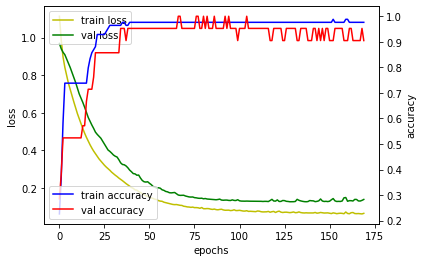

In [51]:
# 2. 모델 구성
model = Sequential()
model.add(Dense(60, input_dim=4, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(3, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# 4. 학습
hist = model.fit(train_X, train_Y, batch_size=50, epochs=300,
                    validation_split=0.2,
                    callbacks=[early_stopping, checkpoint])
# 5.학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [30]:
# 예측
real = np.argmax(test_Y, axis=1) # 실제값
real

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [31]:
pred = model.predict_classes(test_X)
pred

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [34]:
np.all(pred==real)

True

In [37]:
ct_result = pd.crosstab(real, pred)
ct_result.index.name = "real"
ct_result.columns.name = "pred"
ct_result

pred,0,1,2
real,,,
0,14,0,0
1,0,18,0
2,0,0,13


In [48]:
# 평가
score = model.evaluate(test_X, test_Y, batch_size=10)

5/5 [==============================] - 0s 998us/step - loss: 0.0344 - accuracy: 1.0000


In [39]:
print("평가된 loss :", score[0])
print("평가된 accuracy :", score[1])
print(score)

평가된 loss : 0.034357305616140366
평가된 accuracy : 1.0
[0.034357305616140366, 1.0]


In [42]:
iris.iloc[51]

sepal_length           6.4
sepal_width            3.2
petal_length           4.5
petal_width            1.5
species         versicolor
Name: 51, dtype: object

In [45]:
np.argmax(model.predict(np.array([[6.4, 3.2,4.5,1.5]])))

1